## PCA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('pca_data.csv')
print(df.shape)
print(df.head(3))

(227, 20)
     0    1           2          3      4     5      6       7       8     9  \
0  0.0  0.0  31056997.0   647500.0   48.0  0.00  23.06  163.07   700.0  36.0   
1  1.0  3.0   3581655.0    28748.0  124.6  1.26  -4.93   21.52  4500.0  86.5   
2  2.0  6.0  32930091.0  2381740.0   13.8  0.04  -0.39   31.00  6000.0  70.0   

     10     11    12     13   14     15     16     17     18     19  
0   3.2  12.13  0.22  87.65  1.0  46.60  20.34  0.380  0.240  0.380  
1  71.2  21.09  4.42  74.49  3.0  15.11   5.22  0.232  0.188  0.579  
2  78.1   3.22  0.25  96.53  1.0  17.14   4.61  0.101  0.600  0.298  


In [ ]:
m = np.mean(df.T, axis=1)
std = np.std(df.T, axis=1)

c = (df - m)/std
#print(c)

v = np.cov(c.T)
#print(v)
#print(v.shape)

values, vectors = np.linalg.eig(v)
#print(vectors)
#print(len(values))

p = vectors.T.dot(c.T)
#print(p.T)

Text(0, 0.5, 'varience')

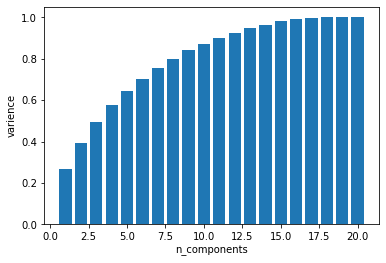

In [ ]:
norm = values/np.sum(values)
y = norm.cumsum()
plt.bar(list(range(1,21)),y)
plt.xlabel('n_components')
plt.ylabel('varience')

In [ ]:
p = vectors[:,:13].T.dot(c.T)
print(p.shape)
print(p)

(13, 227)
[[ 5.16455495 -0.32756775  1.12306897 ...  3.0160129   2.9704789
   1.82210815]
 [-2.33282299  1.47708147 -1.81296605 ... -1.38056027 -0.90895415
  -0.72990903]
 [-0.01526534  0.33833045  2.03011183 ...  0.57846673 -0.53200195
  -0.63186991]
 ...
 [ 0.94940172 -0.47995943 -0.12405867 ...  0.27739052  0.26525716
   0.53619328]
 [ 2.36753852 -0.26619982 -0.35966781 ... -0.65462443  0.61056916
   0.87092737]
 [ 1.12362228 -0.19753652 -1.15467134 ...  0.27018761  0.86925301
   0.93032818]]


In [ ]:
pd.DataFrame(p).to_csv("pca_out.csv", index=False)

## DBSCAN

C:\Users\Marwan\miniconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


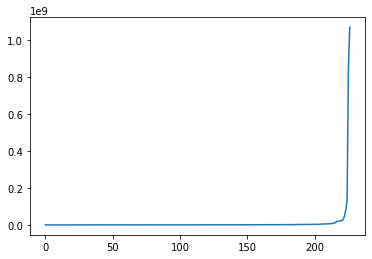

In [ ]:
mins = 3
nn = NearestNeighbors(mins + 1)
nn.fit(df)
distances, neighbors = nn.kneighbors(df)
distances = np.sort(distances[:, mins], axis = 0)
plt.plot(list(range(0,len(distances))), distances)

C:\Users\Marwan\miniconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


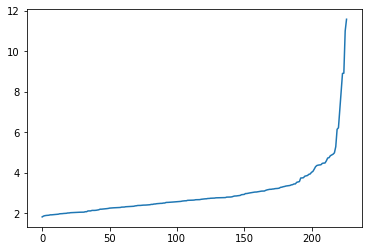

In [ ]:
mins = 4
nn = NearestNeighbors(mins + 1)
nn.fit(df)
distances, neighbors = nn.kneighbors(df)
distances = np.sort(distances[:, mins], axis = 0)
plt.plot(list(range(0,len(distances))), distances)

C:\Users\Marwan\miniconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


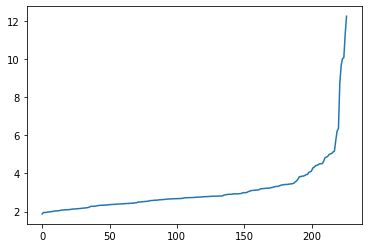

In [ ]:
mins = 5
nn = NearestNeighbors(mins + 1)
nn.fit(df)
distances, neighbors = nn.kneighbors(df)
distances = np.sort(distances[:, mins], axis = 0)
plt.plot(list(range(0,len(distances))), distances)

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
z = StandardScaler()
df = z.fit_transform(df)
print(silhouette_score(df, DBSCAN(min_samples=3,eps=5).fit(df).labels_))
print(silhouette_score(df, DBSCAN(min_samples=4,eps=5).fit(df).labels_))
print(silhouette_score(df, DBSCAN(min_samples=5,eps=5).fit(df).labels_))

0.5036276274829606
0.5036276274829606
0.48760394940085533


In [ ]:
pca = pd.read_csv('pca_out.csv')
pca.head()

,0,1,2,3,4,5,6,7,8,9,...,217,218,219,220,221,222,223,224,225,226
0,5.164555,-0.327568,1.123069,-0.444437,-2.161426,5.357731,-1.941658,-1.788736,-1.102273,-0.528663,...,1.588816,-0.344694,0.261842,-2.259023,1.117969,-0.223322,0.852745,3.016013,2.970479,1.822108
1,-2.332823,1.477081,-1.812966,2.134708,-1.792582,-2.223606,-1.894730,0.659299,-0.542356,1.188546,...,-0.102691,-0.918362,0.955975,0.216920,1.411925,1.995161,-1.606540,-1.380560,-0.908954,-0.729909
2,-0.015265,0.338330,2.030112,-0.546507,-0.573692,0.849884,-0.847250,-0.261518,1.419900,1.212941,...,-1.504403,1.015195,1.807229,-0.547771,-1.206350,-0.263123,-0.070188,0.578467,-0.532002,-0.631870
3,-2.200731,-0.142541,1.723447,2.069346,-0.960907,-1.512104,0.301093,0.373577,-0.270056,-0.418945,...,0.471832,1.699701,1.182216,0.826157,1.000774,0.542655,1.321967,1.633466,-0.724353,-0.873102
4,-1.795008,-0.172352,0.471080,0.270435,0.508237,1.244300,-0.870059,-0.415693,-0.147175,0.947797,...,-0.242724,0.995744,0.587422,0.265792,0.319560,0.573028,0.685460,0.765537,0.719814,0.777760


In [ ]:
# hierarchical with pca
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(pca)
print(silhouette_score(pca,clustering.labels_))

0.3979420051565122


In [ ]:
# kmeans with pca
from sklearn.cluster import KMeans
km = KMeans().fit(pca)
print(silhouette_score(pca,km.labels_))

0.05161020666454102


In [ ]:
# dbscan with pca
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
s = MinMaxScaler()
pca_df = s.fit_transform(pca) 
print(silhouette_score(pca_df, DBSCAN(min_samples=4,eps=4).fit(pca_df).labels_))

-0.040297176104447205
